___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.shape

(1000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

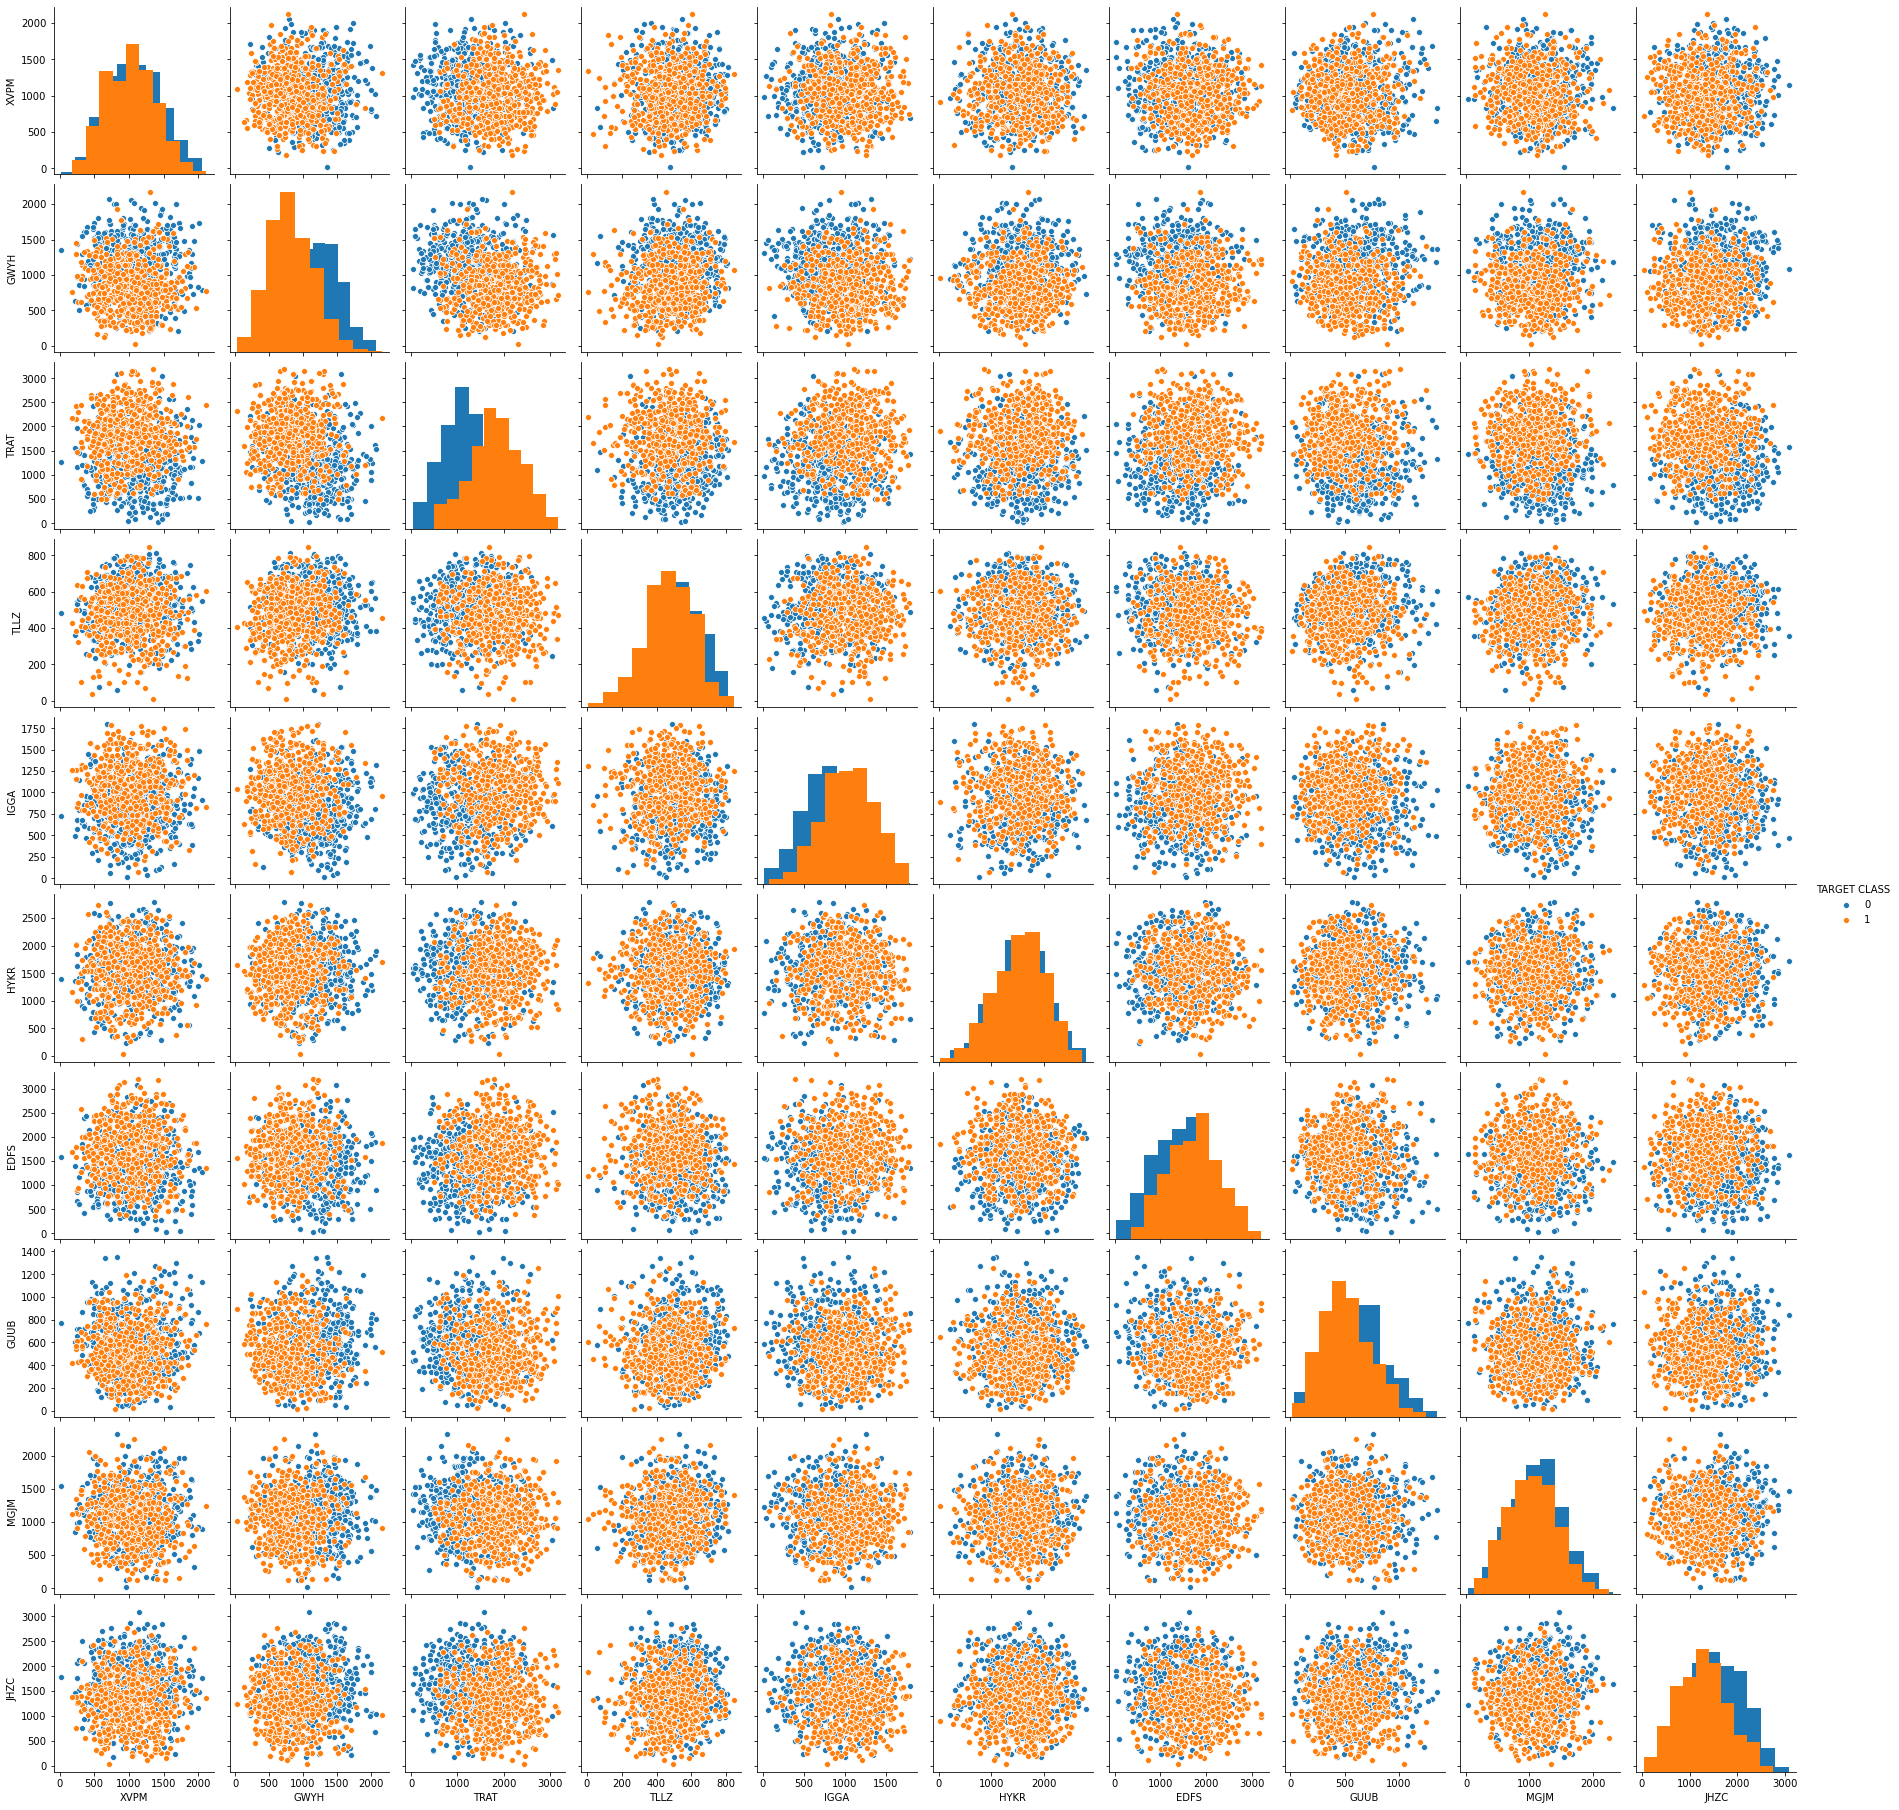

In [7]:
sns.pairplot(df, hue='TARGET CLASS', diag_kind='hist')

**Creating Features and Target Data**

In [8]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [10]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [11]:
scaler.fit(X)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
X = scaler.transform(X)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
df_feat = pd.DataFrame(X, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [19]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
confusion_matrix(y_test, pred)

array([[110,  36],
       [ 47, 107]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

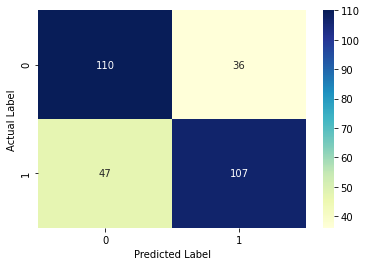

In [22]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [24]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

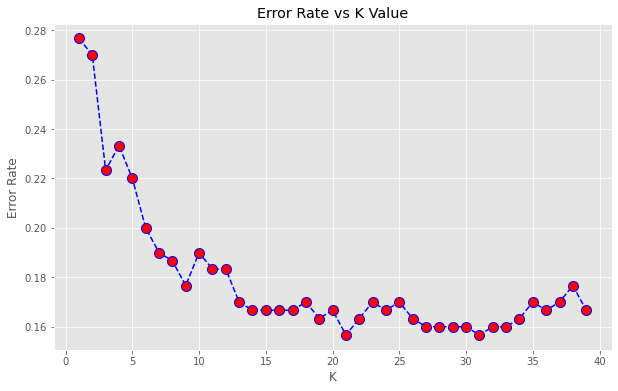

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



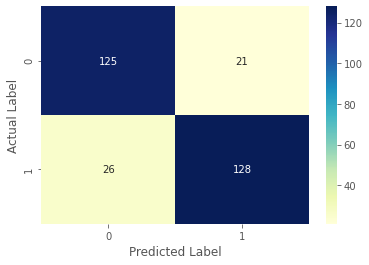

In [26]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, pred))

<br>

<br>

<br>

**_This notebook is part of "Python for Data Science and Machine Learning Bootcamp" Udemy Course by Jose Portilla._**